# ITS307 Data Analytics : Spring Semester 2022
# Assignment 2
# Supervised Learning - Linear Regression


# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Importing Libraries </li>
<li> Loading and Cleaning with Pandas</li>
<li> EDA  </li>
<li> Feature Engineering  </li>
<li> Training Model</li>
<li> Predicting</li>
<li> Evaluating Model</li>

</ol>

# Learning Objectives

Second-hand car have huge market base. Many consider to buy a Used Car intsead of buying of new one, as it's is feasible and a better investment.

The dataset shared contains some of the features that determines the second hand car's price in India. Some of the features of are:
- Name: The brand and model of the car
- Location: The location in which the car is being sold or is available for purchase.
- Year: Year or edition of the model
- Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM
- Fuel_Type: The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car. (Automatic / Manual)
- Owner_Type: Whether the owner is first owner or second owner and so on.
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC.
- Power:
- Seat: Number of the seat of car
- New_Price: Price of the car when its new/first hand
- Price (Target) : Price of the used car


# 1. Loading Libraries

In [960]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler,StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split

# 2. Loading and Cleaning with Pandas

In [961]:
#loading data
traindf = pd.read_csv('train-data.csv')
testdf = pd.read_csv('test-data.csv')

In [962]:
traindf.head()

Unnamed: 0                              Name    Location  Year  \
0           0            Maruti Wagon R LXI CNG      Mumbai  2010   
1           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2           2                      Honda Jazz V     Chennai  2011   
3           3                 Maruti Ertiga VDI     Chennai  2012   
4           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0        NaN   1.75  
1  126.2 bhp    5.0        NaN  12.50  
2   88.7 bhp    5.0  8.61 Lakh   4.50  
3  88.76 bhp    7.0        NaN   6.00  
4  140.8 bhp    5.0        NaN  17.74

In [963]:
testdf.head()

Unnamed: 0                                       Name    Location  Year  \
0           0                    Maruti Alto K10 LXI CNG       Delhi  2014   
1           1              Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2           2  Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3           3                       Toyota Etios Liva GD   Hyderabad  2012   
4           4                          Hyundai i20 Magna      Mumbai  2014   

   Kilometers_Driven Fuel_Type Transmission Owner_Type      Mileage   Engine  \
0              40929       CNG       Manual      First  32.26 km/kg   998 CC   
1              54493    Petrol       Manual     Second    24.7 kmpl   796 CC   
2              34000    Diesel       Manual      First   13.68 kmpl  2393 CC   
3             139000    Diesel       Manual      First   23.59 kmpl  1364 CC   
4              29000    Petrol       Manual      First    18.5 kmpl  1197 CC   

       Power  Seats   New_Price  
0   58.2 bhp    4.0         NaN  
1   47.3 bhp    5.0         NaN  
2  147.8 bhp    7.0  25.27 Lakh  
3   null bhp    5.0         NaN  
4  82.85 bhp    5.0         NaN

In [964]:
traindf.shape

(6019, 14)

In [965]:
testdf.shape

(1234, 13)

In [966]:
#Checking the Columns
traindf.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

In [967]:
#checking total null values in train dataset
traindf.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [968]:
#Dropping the null values
traindf.dropna(subset=['Mileage', 'Engine','Power','Seats'], inplace=True)

In [969]:
traindf.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            5152
Price                   0
dtype: int64

In [970]:
#checking data types of train dataset
traindf.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [971]:
# Changing the datatypes of the train dataset and removing the unwanted characters
traindf['Mileage'] = traindf.Mileage.str.strip('km/kg?kmpl').astype('float')
traindf['Engine'] = traindf.Engine.str.strip('CC').astype('int')
traindf['Power'] = traindf.Power.str.rstrip('bhp')
traindf = traindf[traindf['Power'].str.strip()!='null']
traindf['Power'] = traindf.Power.astype('float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [972]:
#After changing the data types
traindf.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine                 int64
Power                float64
Seats                float64
New_Price             object
Price                float64
dtype: object

In [973]:
#checking the null values of test dataset
testdf.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

In [974]:
#Dropping the null values of test dataset
testdf.dropna(subset=['Engine','Power','Seats'], inplace=True)
testdf.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            1041
dtype: int64

In [975]:
#checking data types of test dataset
testdf.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
dtype: object

In [976]:
# Changing the datatypes of the test dataset and removing the unwanted characters
testdf['Mileage'] = testdf.Mileage.str.strip('km/kg?kmpl').astype('float')
testdf['Engine'] = testdf.Engine.str.strip('CC').astype('int')
testdf['Power'] = testdf.Power.str.rstrip('bhp')
testdf = testdf[testdf['Power'].str.strip()!='null']
testdf['Power'] = testdf.Power.astype('float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [977]:
#Checking for data types
testdf.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine                 int64
Power                float64
Seats                float64
New_Price             object
dtype: object

# 3.  EDA and Visualization

 Most popular Used Cars.

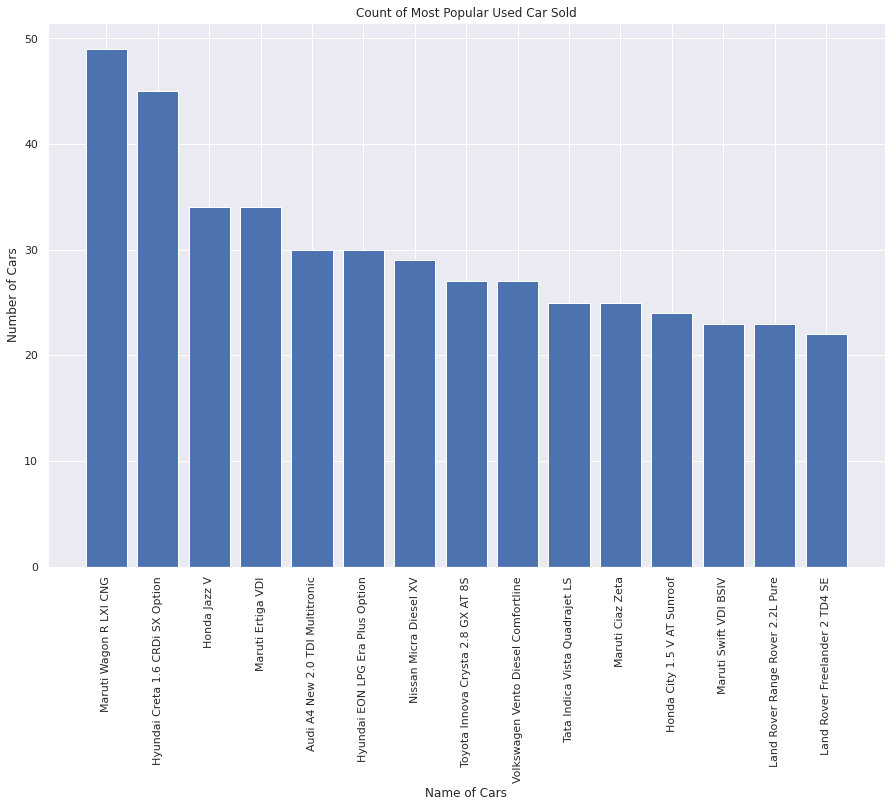

In [978]:
x = traindf.Name.unique()[:15]
y = traindf.Name.value_counts()[:15]
plt.bar(x,y)
plt.title('Count of Most Popular Used Car Sold')
plt.xlabel('Name of Cars')
plt.ylabel('Number of Cars')
plt.xticks(rotation=90)
plt.show()

 Most popular fuel used by car.

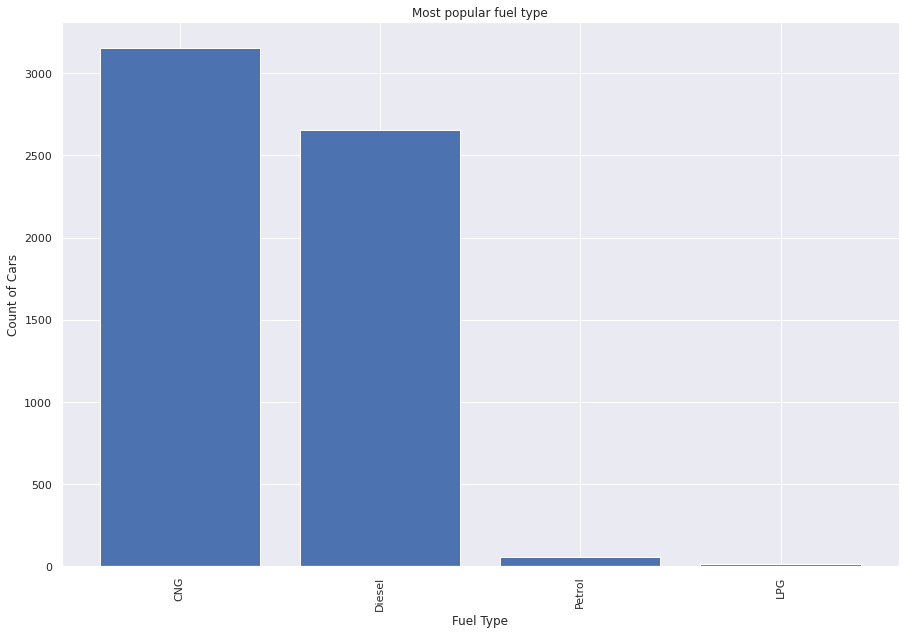

In [979]:
x = traindf.Fuel_Type.unique()
y = traindf.Fuel_Type.value_counts()
plt.bar(x,y)
plt.title('Most popular fuel type')
plt.xlabel('Fuel Type')
plt.ylabel('Count of Cars')
plt.xticks(rotation=90)
plt.show()

Owner Types

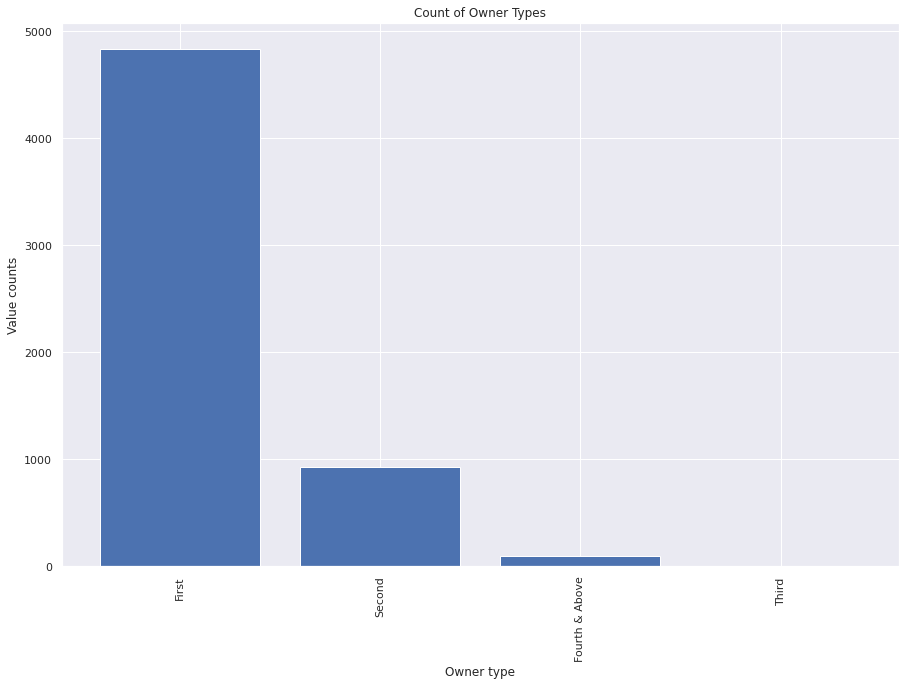

In [980]:
x = traindf.Owner_Type.unique()[:15]
y = traindf.Owner_Type.value_counts()[:15]

sns.set(rc={'figure.figsize':(15,10)})
plt.bar(x,y)
plt.title('Count of Owner Types')
plt.xlabel('Owner type')
plt.ylabel('Value counts')
plt.xticks(rotation=90)
plt.show()

In [981]:
#plotting a correlation to see how each features correlates
corr = new_traindf.corr() 
corr

Kilometers_Driven   Mileage    Engine     Price
Kilometers_Driven           1.000000 -0.178690  0.301197 -0.070025
Mileage                    -0.178690  1.000000 -0.620576 -0.280182
Engine                      0.301197 -0.620576  1.000000  0.638118
Price                      -0.070025 -0.280182  0.638118  1.000000

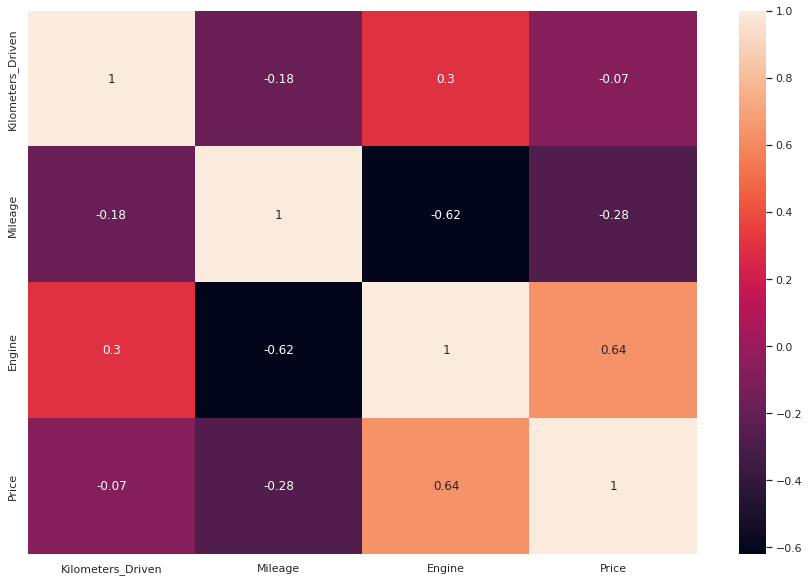

In [982]:
#visualize correlation using heatmap
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data= corr,annot=True)
plt.show()

# 4. Feature Engineering 

***1.1 IQR Method***

#Kilometers-Driven

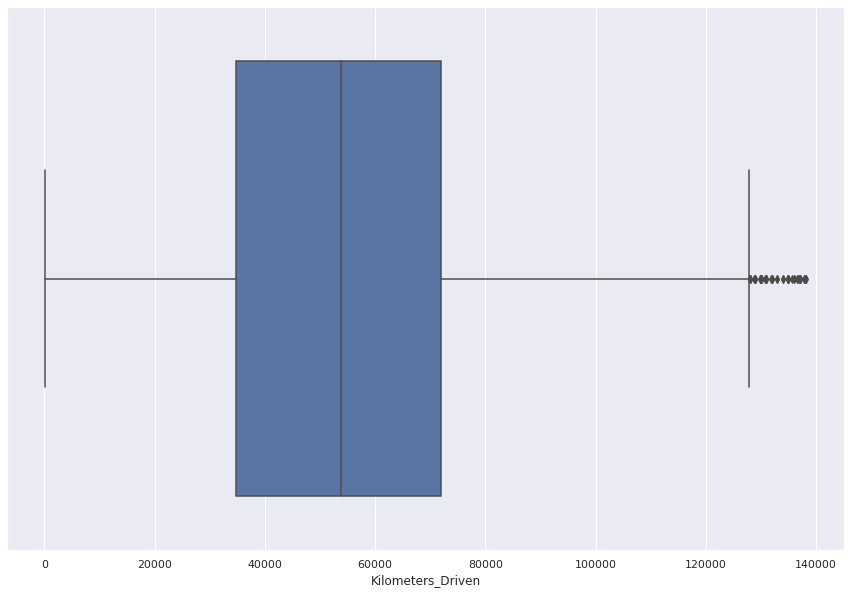

In [983]:
sns.boxplot(x=new_traindf['Kilometers_Driven'])

In [984]:
## calculating IQR and upper limit and lower limit to find outliers
Q1 = new_traindf.Kilometers_Driven.quantile(0.25)
Q3 = new_traindf.Kilometers_Driven.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

In [985]:
## checking outlier
new_traindf[(new_traindf.Kilometers_Driven < lowerlimit)  | (new_traindf.Kilometers_Driven > upperlimit)]

Kilometers_Driven  Mileage  Engine  Price
118              128000    10.80    2497   7.00
154              136997    17.20    1968   8.50
165              131765    13.00    2982  13.50
319              138000    17.10    1396   1.25
345              133944    18.00    1248   3.50
...                 ...      ...     ...    ...
5454             137148    13.90    1599   1.85
5546             128000    25.80    1498   6.30
5569             135000    14.40    1997   3.00
5850             132000    14.95    2489   5.50
5914             132000    18.70    1896   2.25

[68 rows x 4 columns]

In [986]:
## Drop all the rows containing height beyond lower and upper limit.
df1 = new_traindf[(new_traindf.Kilometers_Driven > lowerlimit) & (new_traindf.Kilometers_Driven < upperlimit)]
df1.shape

(5008, 4)

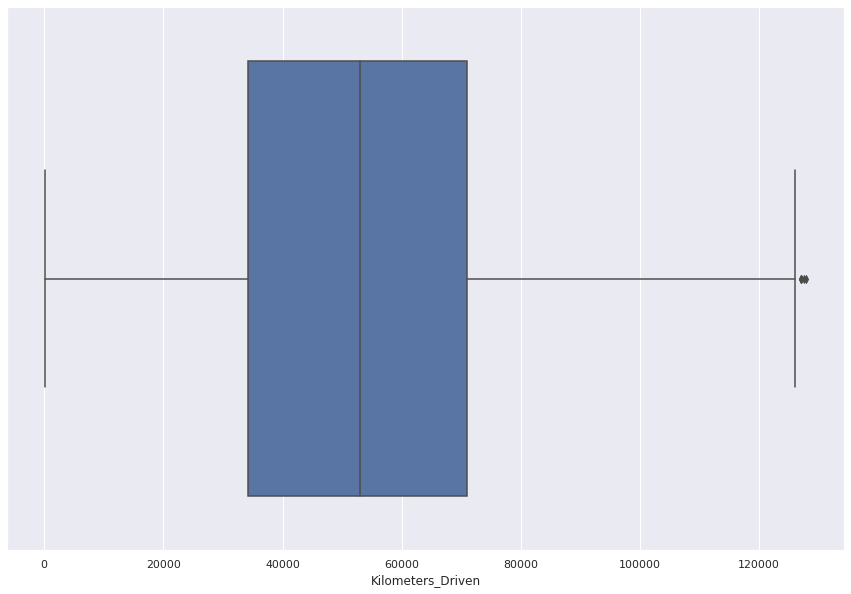

In [987]:
## ploting boxplot to check outliers are removed or not
sns.boxplot(x=df1['Kilometers_Driven'])
plt.show()

#Mileage

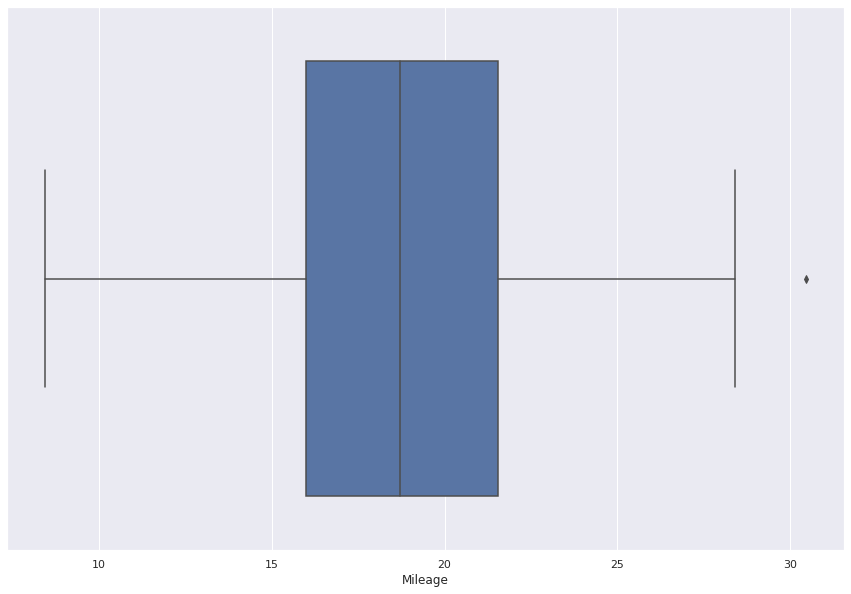

In [988]:
sns.boxplot(x=new_traindf['Mileage'])

In [989]:
## calculating IQR and upper limit and lower limit to find outliers
Q1 = new_traindf.Mileage.quantile(0.25)
Q3 = new_traindf.Mileage.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

In [990]:
## checking outlier
new_traindf[(new_traindf.Mileage < lowerlimit)  | (new_traindf.Mileage > upperlimit)]

Kilometers_Driven  Mileage  Engine  Price
5710              26200    30.46     796   2.15

In [991]:
## Drop all the rows containing height beyond lower and upper limit.
df1 = new_traindf[(new_traindf.Mileage > lowerlimit) & (new_traindf.Mileage < upperlimit)]
df1.shape

(5075, 4)

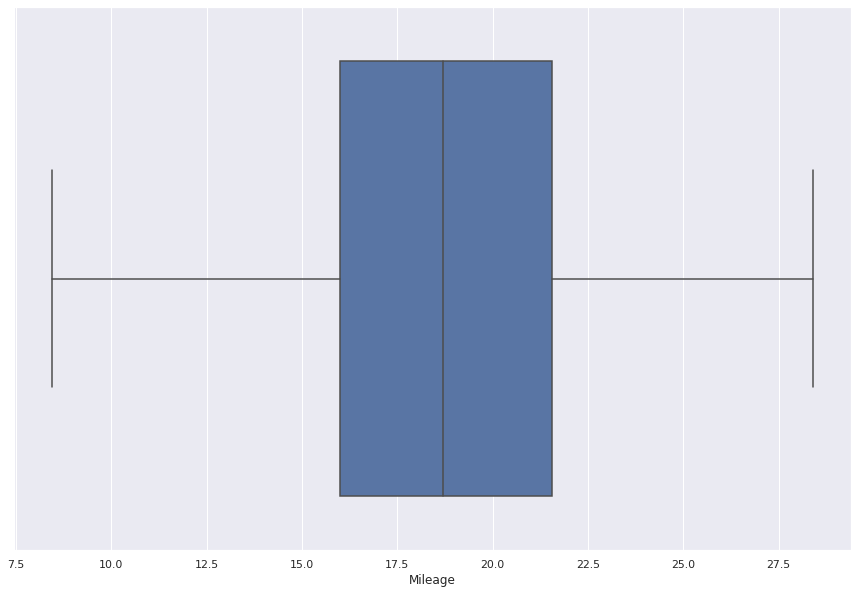

In [992]:
## ploting boxplot to check outliers are removed or not
sns.boxplot(x=df1['Mileage'])
plt.show()

#Price

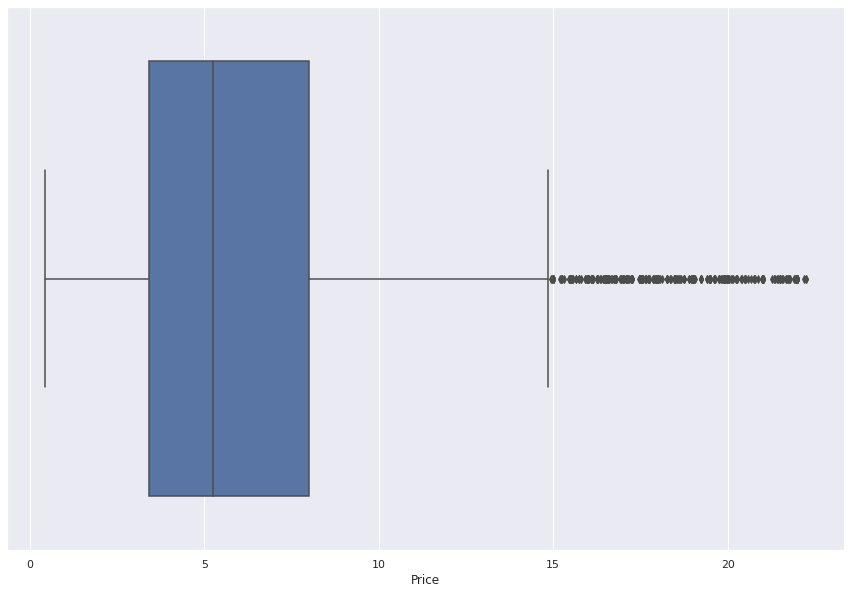

In [993]:
## ploting boxplot to check outliers
sns.boxplot(x=new_traindf['Price'])
plt.show()

In [994]:
## calculating IQR and upper limit and lower limit to find outliers
Q1 = new_traindf.Price.quantile(0.25)
Q3 = new_traindf.Price.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

In [995]:
## checking outlier
new_traindf[(new_traindf.Price < lowerlimit)  | (new_traindf.Price > upperlimit)]

Kilometers_Driven  Mileage  Engine  Price
4                 40670    15.20    1968  17.74
7                 36000    11.36    2755  17.50
15               110000    13.50    2477  15.00
20                32982    22.69    1995  18.55
50                13648    17.11    1968  21.43
...                 ...      ...     ...    ...
5955              79000    15.80    2148  15.50
5965              65000    14.94    2143  16.00
5989              58629    18.25    1968  16.52
6001              91903    17.68    1968  17.56
6009              33500    19.16    2494  19.75

[379 rows x 4 columns]

In [996]:
## Drop all the rows containing height beyond lower and upper limit.
df1 = new_traindf[(new_traindf.Price > lowerlimit) & (new_traindf.Price < upperlimit)]
df1.shape

(4697, 4)

In [997]:
## ploting boxplot to check outliers are removed or not
sns.boxplot(x=df1['Price'])
plt.show()

#Engine

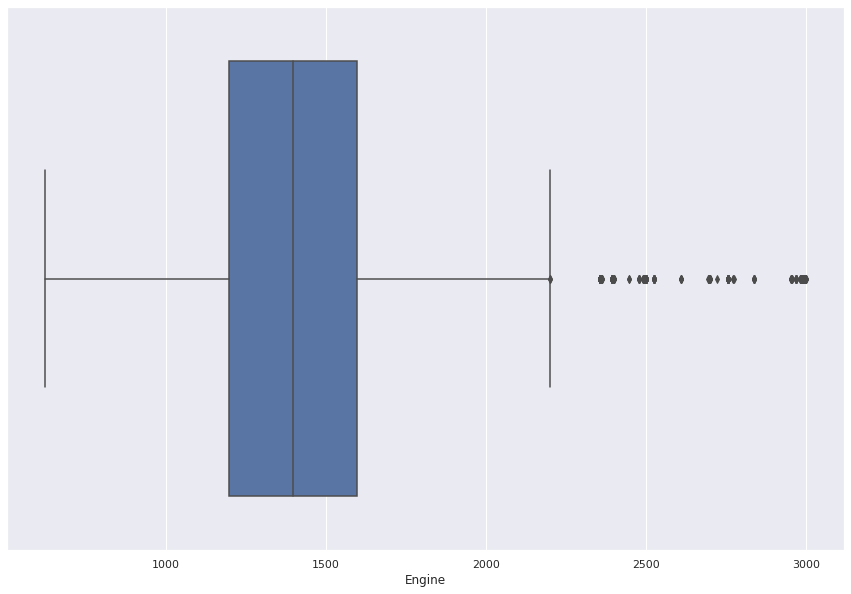

In [998]:
## ploting boxplot to check outliers
sns.boxplot(x=new_traindf['Engine'])
plt.show()

In [999]:
## calculating IQR and upper limit and lower limit to find outliers
Q1 = new_traindf.Engine.quantile(0.25)
Q3 = new_traindf.Engine.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

In [1000]:
## checking outlier
new_traindf[(new_traindf.Engine < lowerlimit)  | (new_traindf.Engine > upperlimit)]

Kilometers_Driven  Mileage  Engine  Price
7                 36000    11.36    2755  17.50
15               110000    13.50    2477  15.00
32                72000    11.18    2696  12.50
33                35000    12.40    2698  11.50
47                70704    11.25    2694  10.95
...                 ...      ...     ...    ...
5979              25000    12.40    2499   8.00
6006             102002     8.70    2987  10.75
6009              33500    19.16    2494  19.75
6012              45004    12.80    2494   9.48
6016              55000    14.00    2498   2.90

[425 rows x 4 columns]

In [1001]:
## Drop all the rows containing height beyond lower and upper limit.
df1 = new_traindf[(new_traindf.Engine > lowerlimit) & (new_traindf.Engine < upperlimit)]
df1.shape

(4651, 4)

In [1002]:
## ploting boxplot to check outliers are removed or not
sns.boxplot(x=df1['Engine'])
plt.show()

**Standard Deviation method**

#Kilometers-Driven

In [1003]:
std = new_traindf.Kilometers_Driven.std()
mean = new_traindf.Kilometers_Driven.mean()
upperlimit = mean+(3*std)
lowerlimit = mean-(3*std)
new_traindf = new_traindf[(new_traindf.Kilometers_Driven>lowerlimit) & (new_traindf.Kilometers_Driven<upperlimit)]

In [1004]:
plt.hist(new_traindf.Kilometers_Driven, bins=30, rwidth=0.8, density=True)
plt.xlabel('Kilometers_Driven')
rang = np.arange(new_traindf.Kilometers_Driven.min(),new_traindf.Kilometers_Driven.max(),0.1)
plt.plot(rang, norm.pdf(rang, new_traindf.Kilometers_Driven.mean(), new_traindf.Kilometers_Driven.std()))
plt.show()

#Mileage

In [1005]:
std = new_traindf.Mileage.std()
mean = new_traindf.Mileage.mean()
upperlimit = mean+(3*std)
lowerlimit = mean-(3*std)
new_traindf = new_traindf[(new_traindf.Mileage>lowerlimit) & (new_traindf.Mileage<upperlimit)]

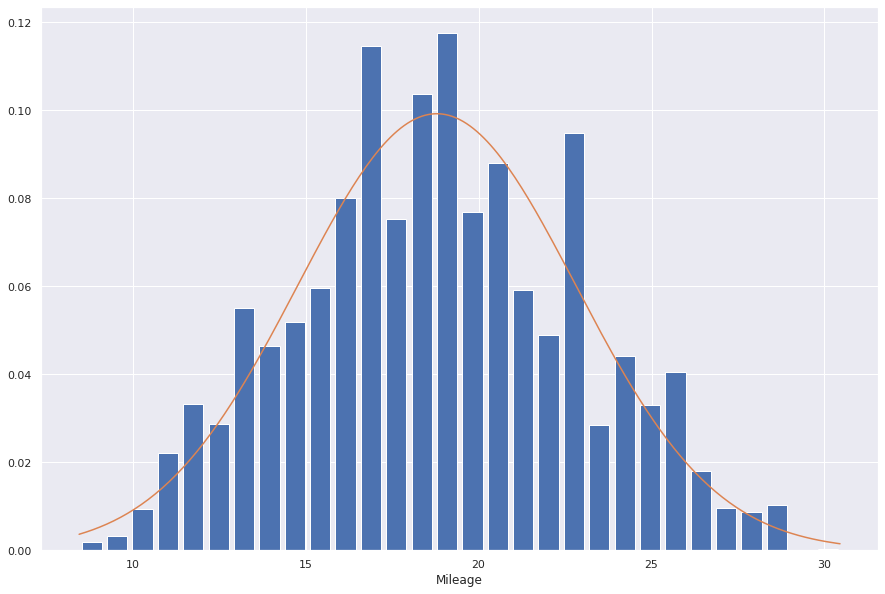

In [1006]:
plt.hist(new_traindf.Mileage, bins=30, rwidth=0.8, density=True)
plt.xlabel('Mileage')
rang = np.arange(new_traindf.Mileage.min(),new_traindf.Mileage.max(),0.1)
plt.plot(rang, norm.pdf(rang, new_traindf.Mileage.mean(), new_traindf.Mileage.std()))
plt.show()

#Engine

In [1007]:
std = new_traindf.Engine.std()
mean = new_traindf.Engine.mean()
upperlimit = mean+(3*std)
lowerlimit = mean-(3*std)
new_traindf = new_traindf[(new_traindf.Engine>lowerlimit) & (new_traindf.Engine<upperlimit)]

In [1008]:
plt.hist(new_traindf.Engine, bins=30, rwidth=0.8, density=True)
plt.xlabel('Engine')
rang = np.arange(new_traindf.Engine.min(),new_traindf.Engine.max(),0.1)
plt.plot(rang, norm.pdf(rang, new_traindf.Engine.mean(), new_traindf.Engine.std()))
plt.show()

#Price

In [1009]:
std = new_traindf.Price.std()
mean = new_traindf.Price.mean()
upperlimit = mean+(3*std)
lowerlimit = mean-(3*std)
new_traindf = new_traindf[(new_traindf.Price>lowerlimit) & (new_traindf.Price<upperlimit)]

In [1010]:
plt.hist(new_traindf.Price, bins=30, rwidth=0.8, density=True)
plt.xlabel('Price')
rang = np.arange(new_traindf.Price.min(),new_traindf.Price.max(),0.1)
plt.plot(rang, norm.pdf(rang, new_traindf.Price.mean(), new_traindf.Price.std()))
plt.show()

**Transformation**

**Log Transformation**

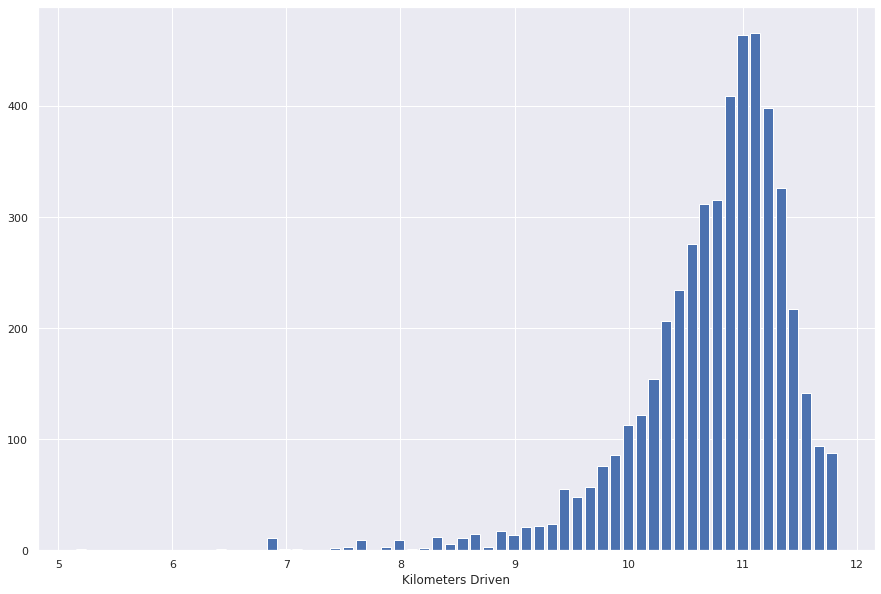

In [1011]:
x = np.log(new_traindf.Kilometers_Driven)
plt.hist(x,bins=60,rwidth=.8)
plt.xlabel('Kilometers Driven')
plt.show()

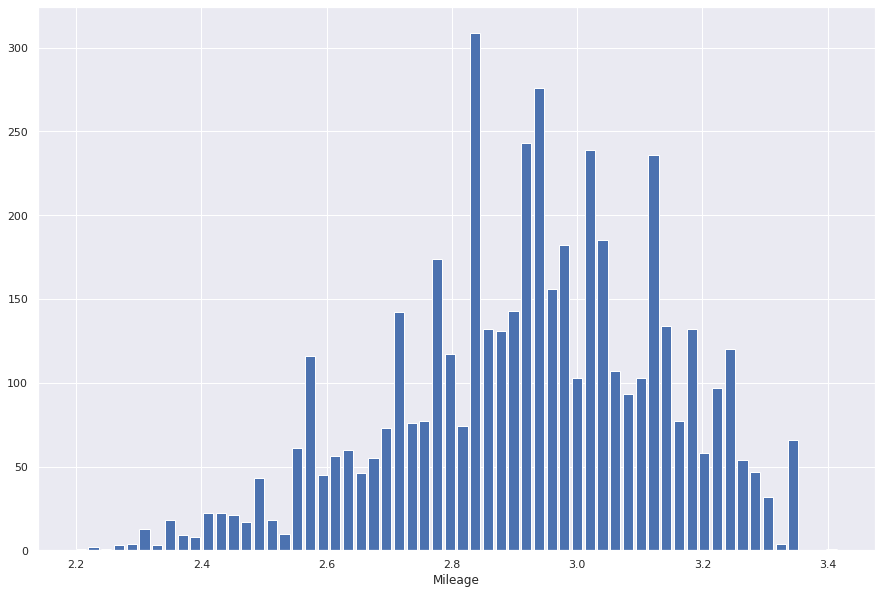

In [1012]:
x = np.log(new_traindf.Mileage)
plt.hist(x,bins=60,rwidth=.8)
plt.xlabel('Mileage')
plt.show()

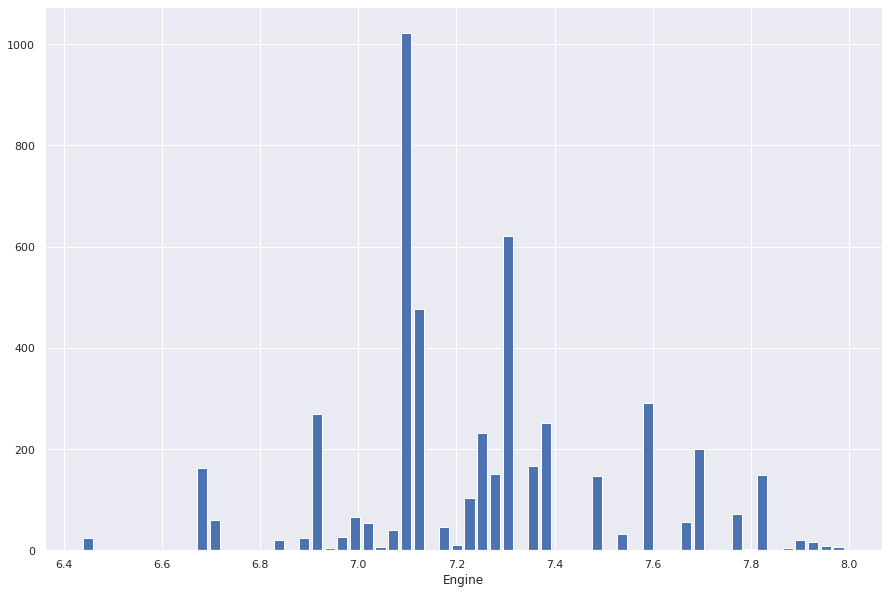

In [1013]:
x = np.log(new_traindf.Engine)
plt.hist(x,bins=60,rwidth=.8)
plt.xlabel('Engine')
plt.show()

In [1014]:
x = np.log(new_traindf.Price)
plt.hist(x,bins=60,rwidth=.8)
plt.xlabel('Price')
plt.show()

**3. Feature Scaling**

In [1015]:
#Using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
numeric = scaler.fit_transform(new_traindf)
new_traindf1 = pd.DataFrame(data=numeric, columns=['Kilometers_Driven','Mileage','Engine','Price'])
new_traindf1.head()

Kilometers_Driven   Mileage    Engine     Price
0           0.521146  0.820130  0.160377  0.070392
1           0.296229  0.497204  0.410806  0.648039
2           0.332506  0.428705  0.246569  0.218162
3           0.629976  0.548462  0.267581  0.298764
4           0.293835  0.288910  0.576329  0.929608

In [1016]:
#Using Standardsaclar
scaler = StandardScaler()
numeric = scaler.fit_transform(new_traindf)
new_traindf2 = pd.DataFrame(data=numeric, columns=['Kilometers_Driven','Mileage','Engine','Price'])
new_traindf2.head()

Kilometers_Driven   Mileage    Engine     Price
0           0.631572  1.937989 -1.091891 -1.126922
1          -0.495500  0.168909  0.295577  1.741088
2          -0.313715 -0.206351 -0.614355 -0.393245
3           1.176929  0.449715 -0.497940  0.006943
4          -0.507498 -0.972186  1.212636  3.139076

In [1017]:
#Using RobustScalar
scaler = RobustScaler()
numeric = scaler.fit_transform(new_traindf)
new_traindf3 = pd.DataFrame(data=numeric, columns=['Kilometers_Driven','Mileage','Engine','Price'])
new_traindf3.head()

Kilometers_Driven   Mileage    Engine     Price
0           0.497127  1.418048 -1.010152 -0.773810
1          -0.323739  0.141805  0.472081  1.785714
2          -0.191341 -0.128913 -0.500000 -0.119048
3           0.894320  0.344383 -0.375635  0.238095
4          -0.332477 -0.681400  1.451777  3.033333

Testing Part

In [1018]:
#selecting some columns and creatin new dataframe
new_testdf = testdf[['Kilometers_Driven','Mileage','Engine']]

Removing outliers

In [1019]:
std = new_testdf.Kilometers_Driven.std()
mean = new_testdf.Kilometers_Driven.mean()
upperlimit = mean+(3*std)
lowerlimit = mean-(3*std)
new_testdf = new_testdf[(new_testdf.Kilometers_Driven>lowerlimit) & (new_testdf.Kilometers_Driven<upperlimit)]

plt.hist(new_testdf.Kilometers_Driven, bins=30, rwidth=0.8, density=True)
plt.xlabel('Kilometers_Driven')
rang = np.arange(new_testdf.Kilometers_Driven.min(),new_testdf.Kilometers_Driven.max(),0.1)
plt.plot(rang, norm.pdf(rang, new_testdf.Kilometers_Driven.mean(), new_testdf.Kilometers_Driven.std()))
plt.show()

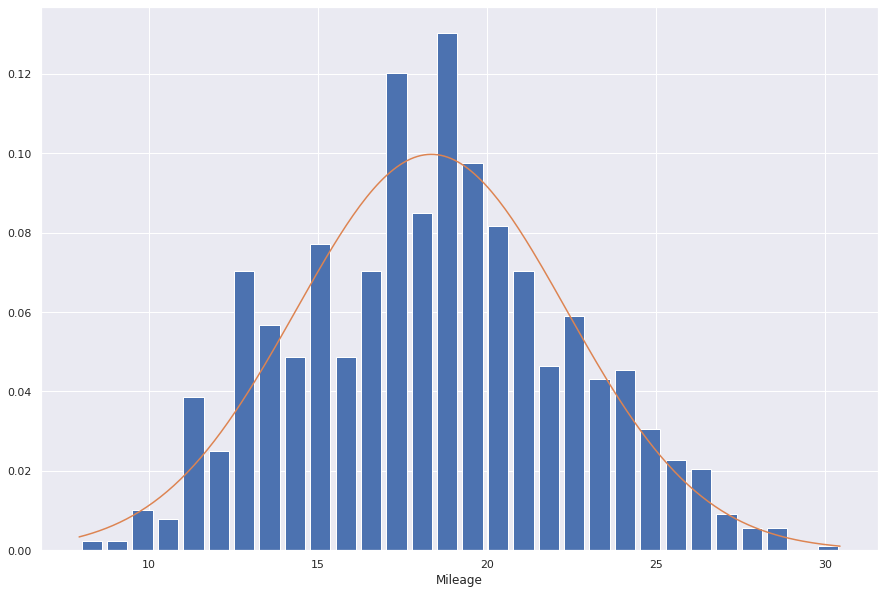

In [1020]:
std = new_testdf.Mileage.std()
mean = new_testdf.Mileage.mean()
upperlimit = mean+(3*std)
lowerlimit = mean-(3*std)
new_testdf = new_testdf[(new_testdf.Mileage>lowerlimit) & (new_testdf.Mileage<upperlimit)]

plt.hist(new_testdf.Mileage, bins=30, rwidth=0.8, density=True)
plt.xlabel('Mileage')
rang = np.arange(new_testdf.Mileage.min(),new_testdf.Mileage.max(),0.1)
plt.plot(rang, norm.pdf(rang, new_testdf.Mileage.mean(), new_testdf.Mileage.std()))
plt.show()

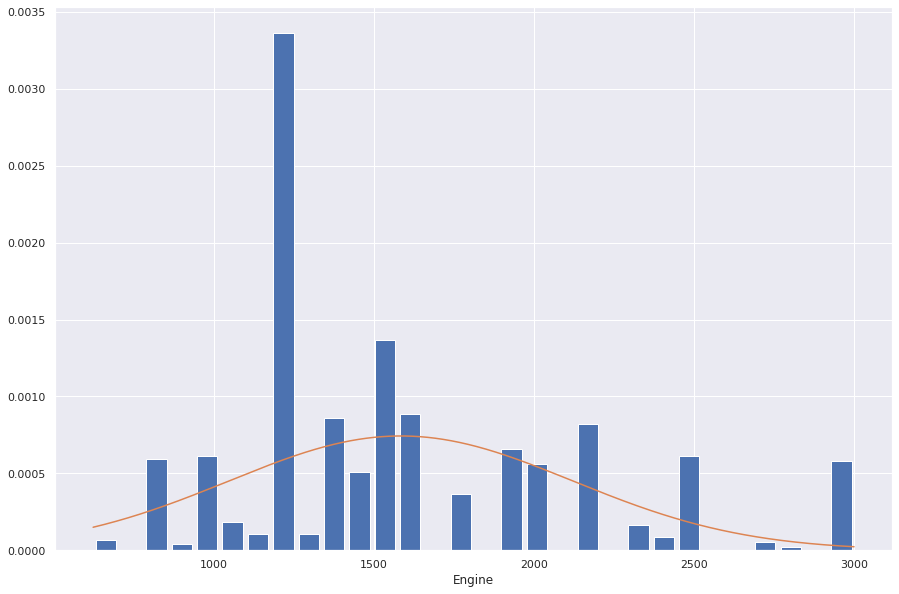

In [1021]:
std = new_testdf.Engine.std()
mean = new_testdf.Engine.mean()
upperlimit = mean+(3*std)
lowerlimit = mean-(3*std)
new_testdf = new_testdf[(new_testdf.Engine>lowerlimit) & (new_testdf.Engine<upperlimit)]

plt.hist(new_testdf.Engine, bins=30, rwidth=0.8, density=True)
plt.xlabel('Engine')
rang = np.arange(new_testdf.Engine.min(),new_testdf.Engine.max(),0.1)
plt.plot(rang, norm.pdf(rang, new_testdf.Engine.mean(), new_testdf.Engine.std()))
plt.show()

Transformation

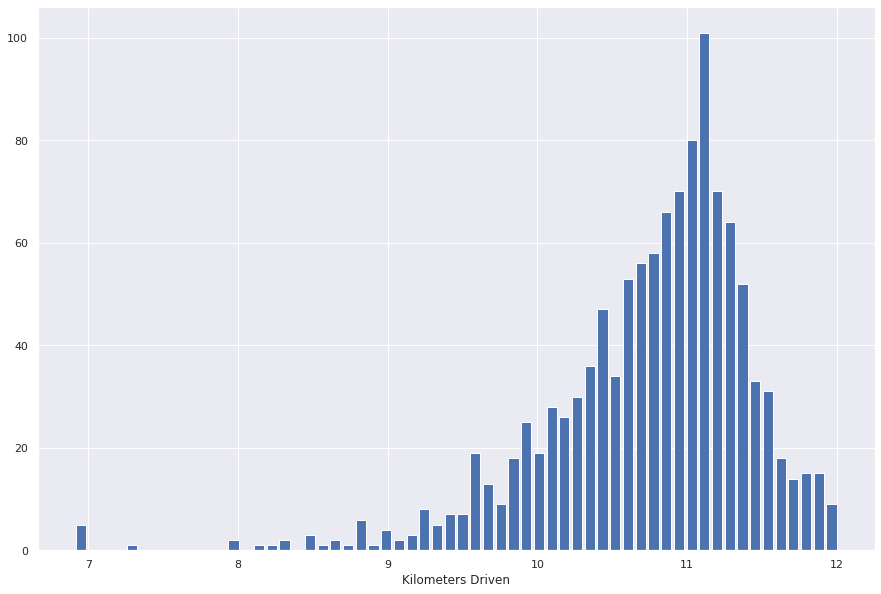

In [1022]:
x = np.log(new_testdf.Kilometers_Driven)
plt.hist(x,bins=60,rwidth=.8)
plt.xlabel('Kilometers Driven')
plt.show()

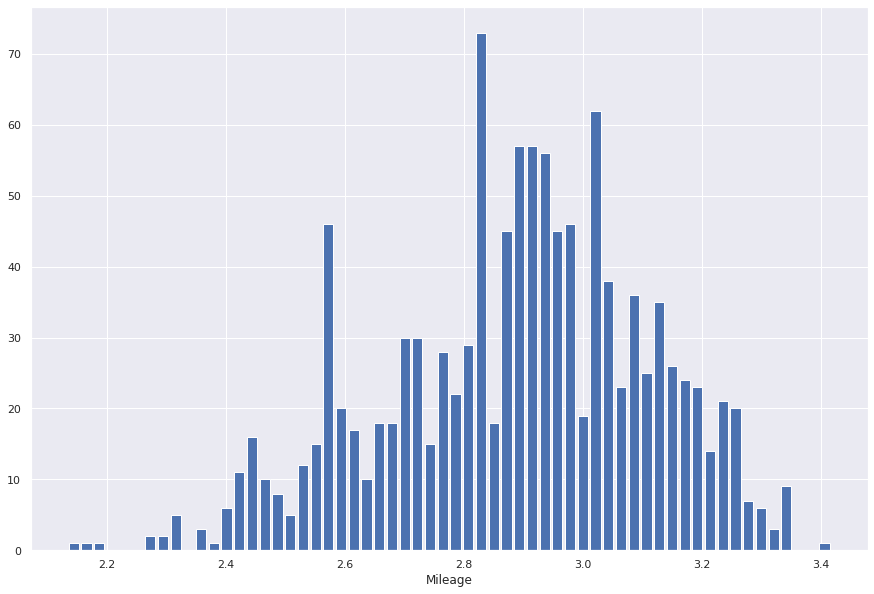

In [1023]:
x = np.log(new_testdf.Mileage)
plt.hist(x,bins=60,rwidth=.8)
plt.xlabel('Mileage')
plt.show()

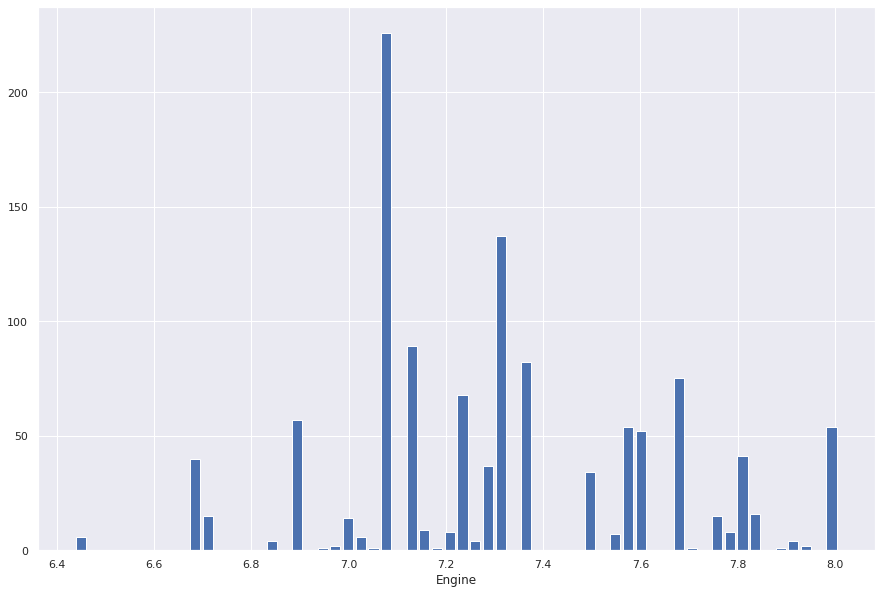

In [1024]:
x = np.log(new_testdf.Engine)
plt.hist(x,bins=60,rwidth=.8)
plt.xlabel('Engine')
plt.show()

## Feature Scaling and Standardization

In [1025]:
scaler = MinMaxScaler(feature_range=(0, 1))
numeric = scaler.fit_transform(new_testdf)
new_testdf1 = pd.DataFrame(data=numeric, columns=['Kilometers_Driven','Mileage','Engine'])
new_testdf1.head()

Kilometers_Driven   Mileage    Engine
0           0.328178  0.738301  0.072421
1           0.202454  0.237619  0.744842
2           0.171779  0.456611  0.241263
3           0.519074  0.343026  0.654737
4           0.355828  0.186279  0.992842

In [1026]:
scaler = StandardScaler()
numeric = scaler.fit_transform(new_testdf)
new_testdf2 = pd.DataFrame(data=numeric, columns=['Kilometers_Driven','Mileage','Engine'])
new_testdf2.head()

Kilometers_Driven   Mileage    Engine
0          -0.048157  1.589840 -1.469727
1          -0.715380 -1.184398  1.506950
2          -0.878173  0.029016 -0.722296
3           0.964935 -0.600348  1.108071
4           0.098584 -1.468871  2.604798

In [1027]:
scaler = RobustScaler()
numeric = scaler.fit_transform(new_testdf)
new_testdf3 = pd.DataFrame(data=numeric, columns=['Kilometers_Driven','Mileage','Engine'])
new_testdf3.head()

Kilometers_Driven   Mileage    Engine
0           0.027356  1.087719 -0.863636
1          -0.493161 -0.845614  1.210390
2          -0.620160  0.000000 -0.342857
3           0.817693 -0.438596  0.932468
4           0.141832 -1.043860  1.975325

# 5. Training Model

In [1028]:
#create instance of LinearRegression
#using MinMaxScaler data
model1 = LinearRegression()
#using StandardScaler data
model2 = LinearRegression()
#using RobustScaler data
model3 = LinearRegression()

In [1029]:
## Train-Test split
X, y = new_traindf1.iloc[:,:-1],new_traindf1.Price

#use sklearn train_test_split() method to split your data into training and testing set
X1_train,X1_test,y1_train,y1_test = train_test_split(X,y,test_size = 0.20)

In [1030]:
model1.fit(X1_train,y1_train)
model1

LinearRegression()

In [1031]:
model1.coef_

array([-0.31513171,  0.22400003,  0.89054374])

In [1032]:
model1.intercept_

-0.0003193658324105453

In [1033]:
## Train-Test split
X, y = new_traindf2.iloc[:,:-1],new_traindf2.Price

#use sklearn train_test_split() method to split your data into training and testing set
X2_train,X2_test,y2_train,y2_test = train_test_split(X,y,test_size = 0.20)

In [1034]:
model2.fit(X2_train,y2_train)
model2

LinearRegression()

In [1035]:
model2.coef_

array([-0.33049514,  0.20903822,  0.79111858])

In [1036]:
model2.intercept_

-0.0005639773730158663

In [1037]:
## Train-Test split
X, y = new_traindf3.iloc[:,:-1],new_traindf3.Price

#use sklearn train_test_split() method to split your data into training and testing set
X3_train,X3_test,y3_train,y3_test = train_test_split(X,y,test_size = 0.20)

In [1038]:
model3.fit(X3_train,y3_train)
model3

LinearRegression()

In [1039]:
model3.coef_

array([-0.38456192,  0.23624478,  0.67045523])

In [1040]:
model3.intercept_

0.14170323692872555

# 6. Prediction

In [1041]:
model1.predict(X1_test)

array([ 0.32270517,  0.2134434 ,  0.37658242,  0.56038205,  0.53946005,
        0.38956954,  0.24694196,  0.29539427,  0.43442796,  0.64608757,
        0.24236916,  0.19493232,  0.47484348,  0.35365598,  0.05397641,
        0.58004004,  0.28930904,  0.36533541,  0.21264601,  0.27162953,
        0.20974814,  0.28214807,  0.22924096,  0.39349722,  0.31436916,
        0.35196739,  0.26775823,  0.47705332,  0.22381642,  0.54488564,
        0.63125248,  0.42230805,  0.28534324,  0.51438771,  0.24049722,
        0.27565226,  0.25263025,  0.34261007,  0.63953156,  0.24626939,
        0.23445409,  0.47240972,  0.10526336,  0.06174511,  0.59461829,
        0.2621313 ,  0.12114857,  0.42823236,  0.26665111,  0.2999659 ,
        0.25630203,  0.2132377 ,  0.26420359,  0.17134089,  0.25805364,
        0.30245724,  0.62229441,  0.29964042,  0.15638523,  0.4124535 ,
        0.37623408,  0.22848295,  0.39920331,  0.32873638,  0.47448143,
        0.21173366,  0.21624819,  0.21807783,  0.29492741,  0.46

In [1042]:
#checking the model by mapping the output value with the dataset value
x = np.array([0.239567,0.826595,0.145186]).reshape(-1,3)
model1.predict(x) 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([0.23863726])

In [1043]:
model2.predict(X2_test)

array([-5.58657509e-01,  1.17424057e+00, -1.14584894e+00, -2.42445172e-01,
        9.05878891e-01,  1.29846223e+00, -4.54921492e-02, -5.94197383e-01,
        8.03532769e-01,  1.21512596e-01, -5.16311124e-01, -1.23006503e-01,
        1.27574360e+00, -1.13959930e+00,  7.78225503e-01, -8.92535401e-01,
       -5.39564297e-01, -1.04036307e+00,  1.02742056e+00, -3.66622871e-01,
       -5.58661074e-01,  5.02937546e-01, -3.43605734e-01, -2.33362391e-01,
       -2.19133434e-01, -6.84693498e-01, -7.73512160e-02,  1.10628861e+00,
       -4.50613281e-01, -3.85491697e-01, -4.75892221e-01, -1.64148830e-01,
        1.06069765e-01,  4.21508698e-01, -2.29969450e-01, -6.87032229e-01,
        2.27346314e-01, -1.53414576e+00, -2.40062576e-01,  4.08051547e-01,
        1.11721513e-01, -6.38030311e-01,  5.00408110e-01,  3.49241885e-01,
        7.70159737e-01, -4.79591887e-01, -8.68320426e-01,  1.79471436e-01,
       -2.72621364e-01,  1.70687599e-01,  9.39322930e-01, -2.81793227e-01,
        6.50387272e-01, -

In [1044]:
#checking the model by mapping the output value with the dataset value
x = np.array([0.436653,1.991182,-1.096283]).reshape(-1,3)
model2.predict(x) 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([-0.59593237])

In [1045]:
model3.predict(X3_test)

array([ 4.48188138e-01,  2.00974551e-01,  3.47266265e-01,  1.57545135e+00,
       -3.26752867e-02,  5.09727868e-01, -3.64331089e-01,  1.57166607e-01,
        7.34173301e-01,  5.40969077e-01,  7.95274107e-02,  1.16530785e+00,
        9.29208946e-02,  3.84669247e-01,  1.81847858e-01,  1.77557531e-01,
        7.34952077e-01,  1.08689990e-01,  1.83203705e+00, -1.50381241e-01,
        2.49908574e-01,  6.63025813e-01,  1.38422614e+00,  3.82722734e-01,
        2.50474275e-01,  6.80354486e-01,  8.38634129e-01, -1.35781091e-02,
       -3.54591615e-01, -5.49331712e-02,  4.63137844e-01,  6.00972291e-02,
        4.26910639e-01,  1.17083450e-01,  5.56102313e-01, -1.45952061e-01,
        1.14623746e+00, -2.63763492e-01,  7.06821799e-02,  2.21319662e-01,
        1.31795685e+00, -7.25922338e-03,  8.44892727e-01, -4.08415845e-01,
       -5.01696559e-01, -4.96860054e-01,  6.65308193e-01, -6.32601089e-03,
        1.77054939e+00,  5.42403572e-01,  1.30662624e-01,  5.52566955e-01,
        3.24378885e-01, -

In [1046]:
#checking the model by mapping the output value with the dataset value
x = np.array([0.478080,1.464738,-0.600519]).reshape(-1,3)
model3.predict(x)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([-0.09873252])

# 7. Evaluating your Model

In [1047]:
#accuracy score for training set
model1.score(X1_train,y1_train)

0.4614334483398743

In [1048]:
#accuracy score for test set
model1.score(X1_test,y1_test)

0.43910478564530553

In [1049]:
#accuracy score for training set
model2.score(X2_train,y2_train)

0.4570500824198991

In [1050]:
#accuracy score for test set
model2.score(X2_test,y2_test)

0.4555979055126549

In [1051]:
#accuracy score for training set
model3.score(X3_train,y3_train)

#accuracy score for test set
model1.score(X1_test,y3_test)

#predicted value for test data
y1_hat = model1.predict(X1_test)

# SUBMISSION DATE: 2nd April 2022